In [1]:
#calling the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Cardiotocographic.csv')
df.head(2)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.0,0.00000,0.0,0.00000,0.00000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.0,0.00638,0.0,0.00638,0.00319,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0


In [3]:
df.info()
#checking for the datatype and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [65]:
# Convert 'Tendency' and 'NSP' to categorical
df['Tendency'] = df['Tendency'].astype('category')
df['NSP'] = df['NSP'].astype('category')

In [49]:
# Handle missing values (imputation with median)
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].median(), inplace=True) # Impute with median
#While median imputation is generally better for this dataset, always consider the specific characteristics of your data and the implications of your chosen imputation method.

In [50]:
# Option 2: Remove rows with null values (if imputation is not suitable)
# df.dropna(inplace=True)

In [51]:
# Check for missing values after handling
print("\nMissing Values after handling:")
print(df.isnull().sum())


Missing Values after handling:
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [53]:
# Function to detect and treat outliers using IQR

def treat_outliers_iqr(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df
    

In [54]:
# Treat outliers for numerical columns

numerical_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width'] #NSP and tendency should not be treated as numerical.
for col in numerical_cols:
   df = treat_outliers_iqr(df, col)
    

In [66]:
#numerical_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width']

In [55]:
# Statistical Summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.290331     0.003132     0.001568     0.004362     0.001770   
std       9.930268     0.003828     0.002485     0.003001     0.002668   
min     105.000000    -0.008409    -0.003850    -0.005177    -0.004934   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     161.000000     0.014015     0.006416     0.013564     0.008224   

           DS      DP         ASTV         MSTV         ALTV         MLTV  \
count  2126.0  2126.0  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.0     0.0    46.981873     1.304644     6.691678     8.007471   
std       0.0     0.0    17.612745     0.781091    10.378400     5.047078   
min

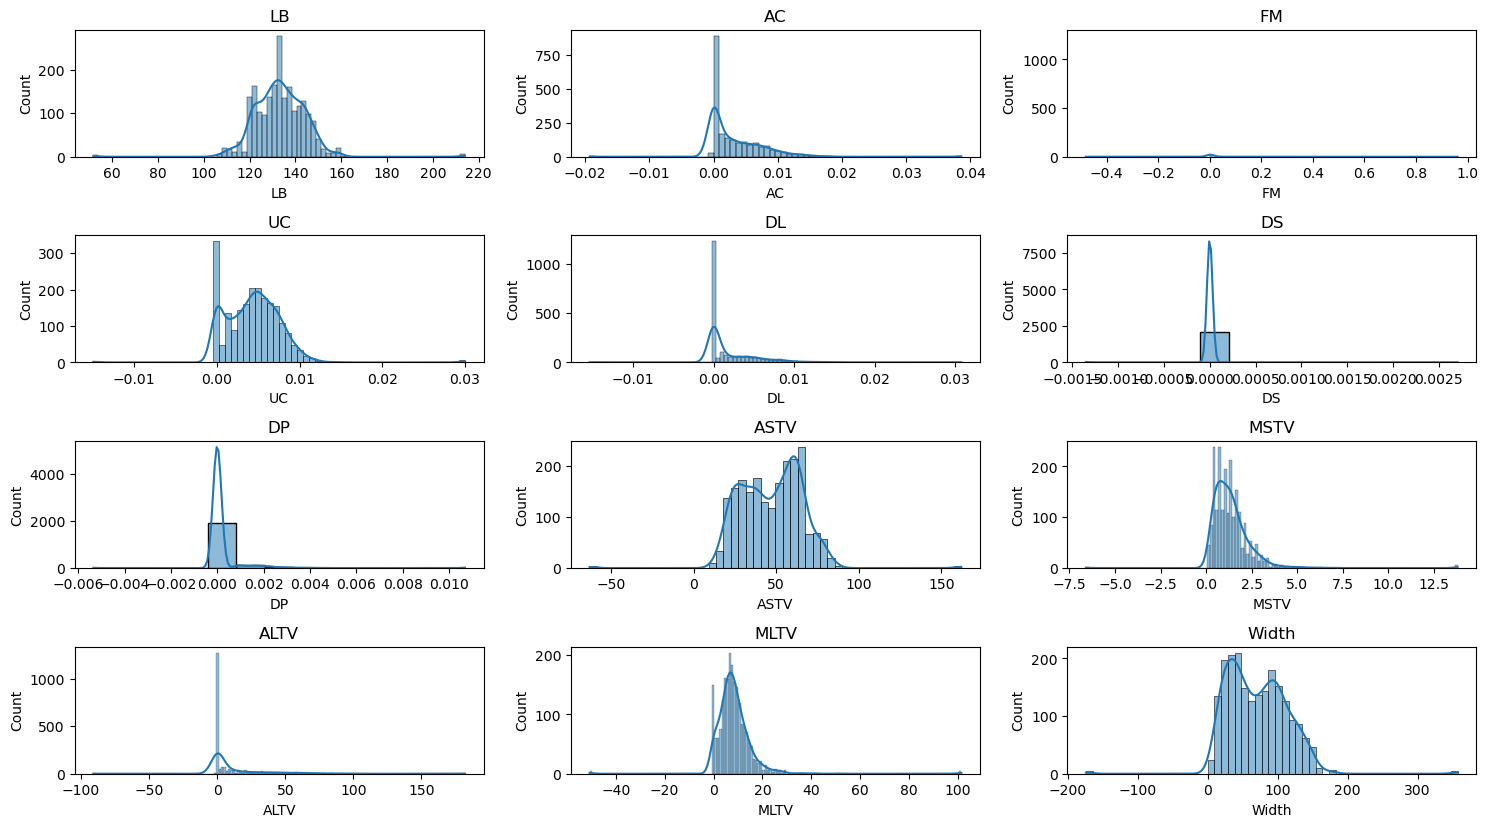

In [67]:
# Histograms for numerical variables

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

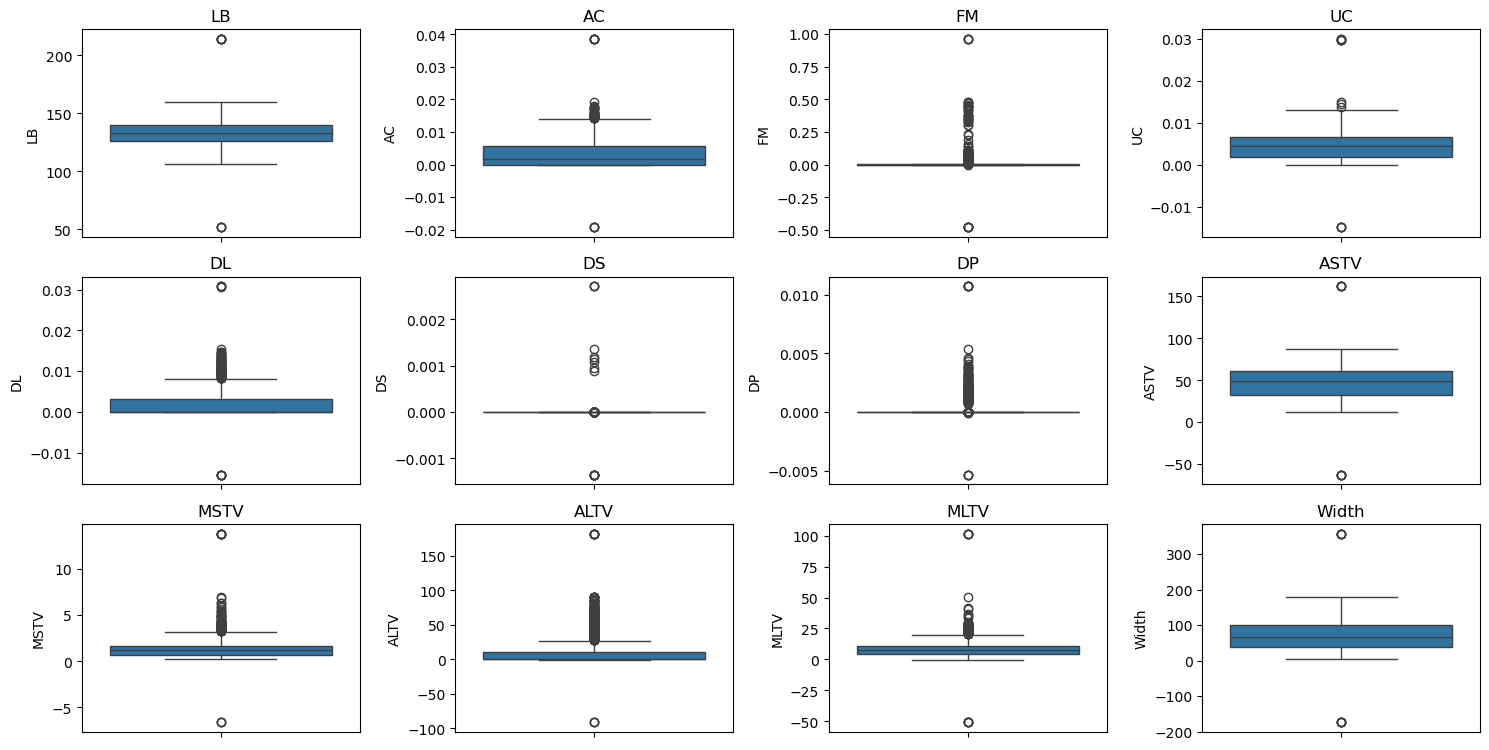

In [68]:
# Boxplots for numerical variables to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

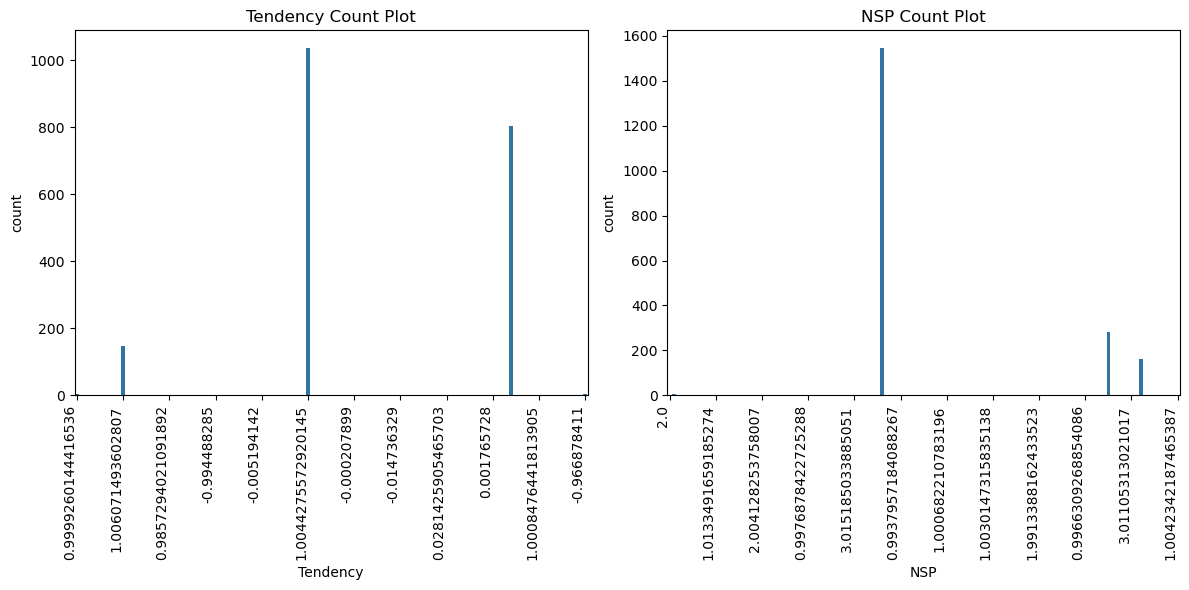

In [72]:
# Bar Charts (Count Plots) with rotated x-axis labels
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Tendency', data=df)
plt.title('Tendency Count Plot')

n = 10  # Display every 10th label
plt.xticks(range(0, len(df['Tendency'].unique()), n),
           df['Tendency'].unique()[::n],
           rotation=90, ha='right', va='top')
plt.subplot(1, 2, 2)
sns.countplot(x='NSP', data=df)
plt.title('NSP Count Plot')
plt.xticks(range(0, len(df['NSP'].unique()), n),
           df['NSP'].unique()[::n],
           rotation=90, ha='right', va='top')
plt.tight_layout()
plt.show()


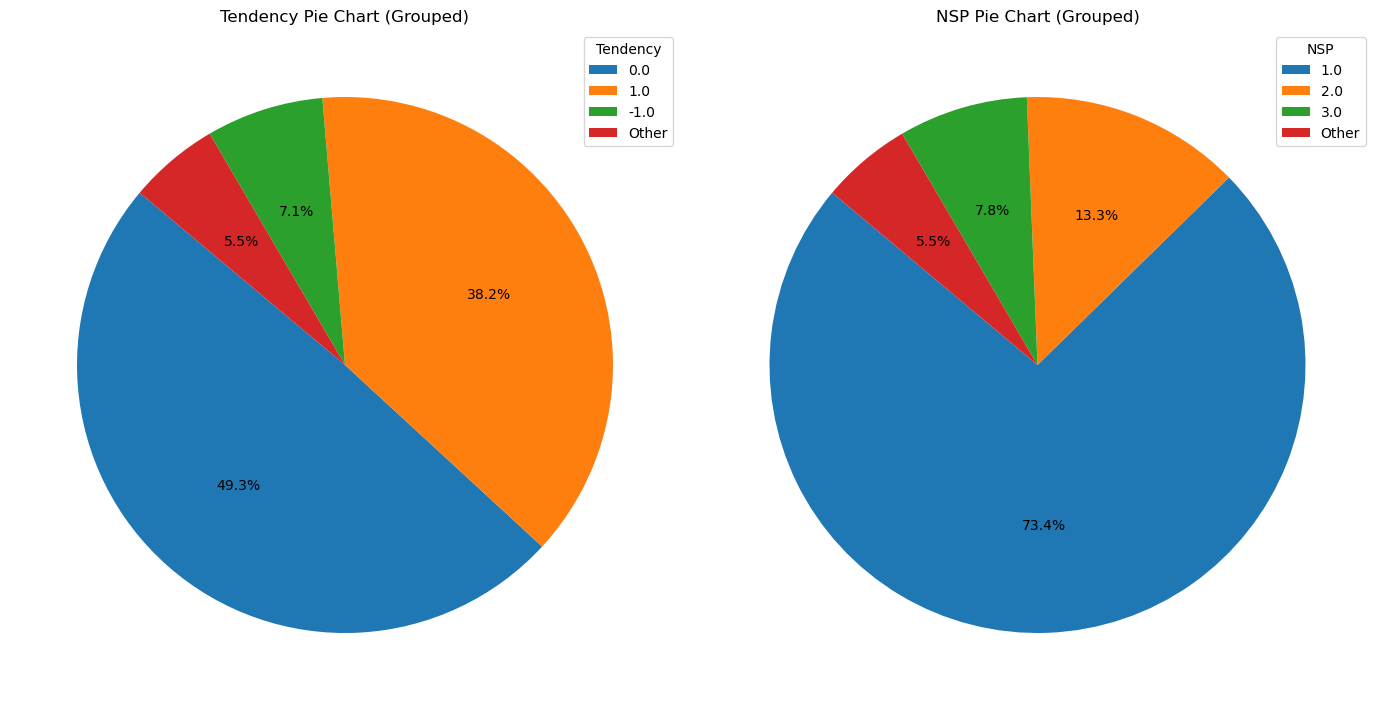

In [74]:
# Pie Charts
# Function to group less frequent categories
def group_less_frequent(series, threshold=0.05):
    counts = series.value_counts(normalize=True)
    less_frequent = counts[counts < threshold].index
    return series.apply(lambda x: 'Other' if x in less_frequent else x)

# Group less frequent categories
df['Tendency_grouped'] = group_less_frequent(df['Tendency'])
df['NSP_grouped'] = group_less_frequent(df['NSP'])
# Pie Charts with legend
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
tendency_counts = df['Tendency_grouped'].value_counts()
plt.pie(tendency_counts, autopct='%1.1f%%', startangle=140)
plt.title('Tendency Pie Chart (Grouped)')
plt.legend(tendency_counts.index, title='Tendency')
plt.subplot(1, 2, 2)
nsp_counts = df['NSP_grouped'].value_counts()
plt.pie(nsp_counts, autopct='%1.1f%%', startangle=140)
plt.title('NSP Pie Chart (Grouped)')
plt.legend(nsp_counts.index, title='NSP')
plt.tight_layout()
plt.show()

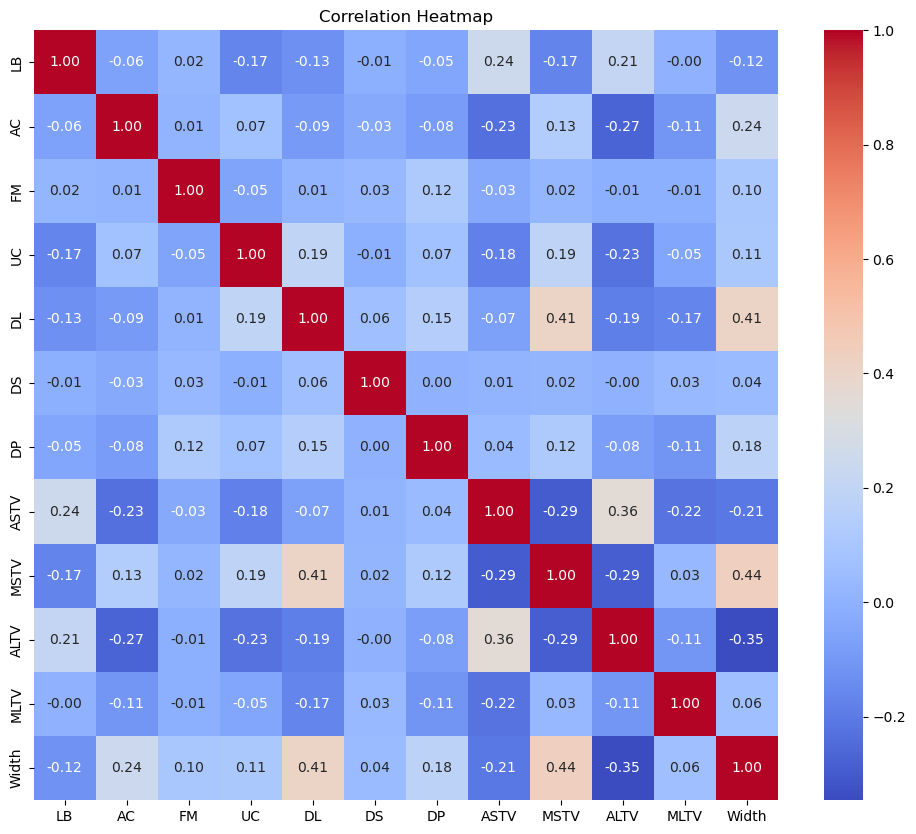

In [69]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


<Figure size 1500x1000 with 0 Axes>

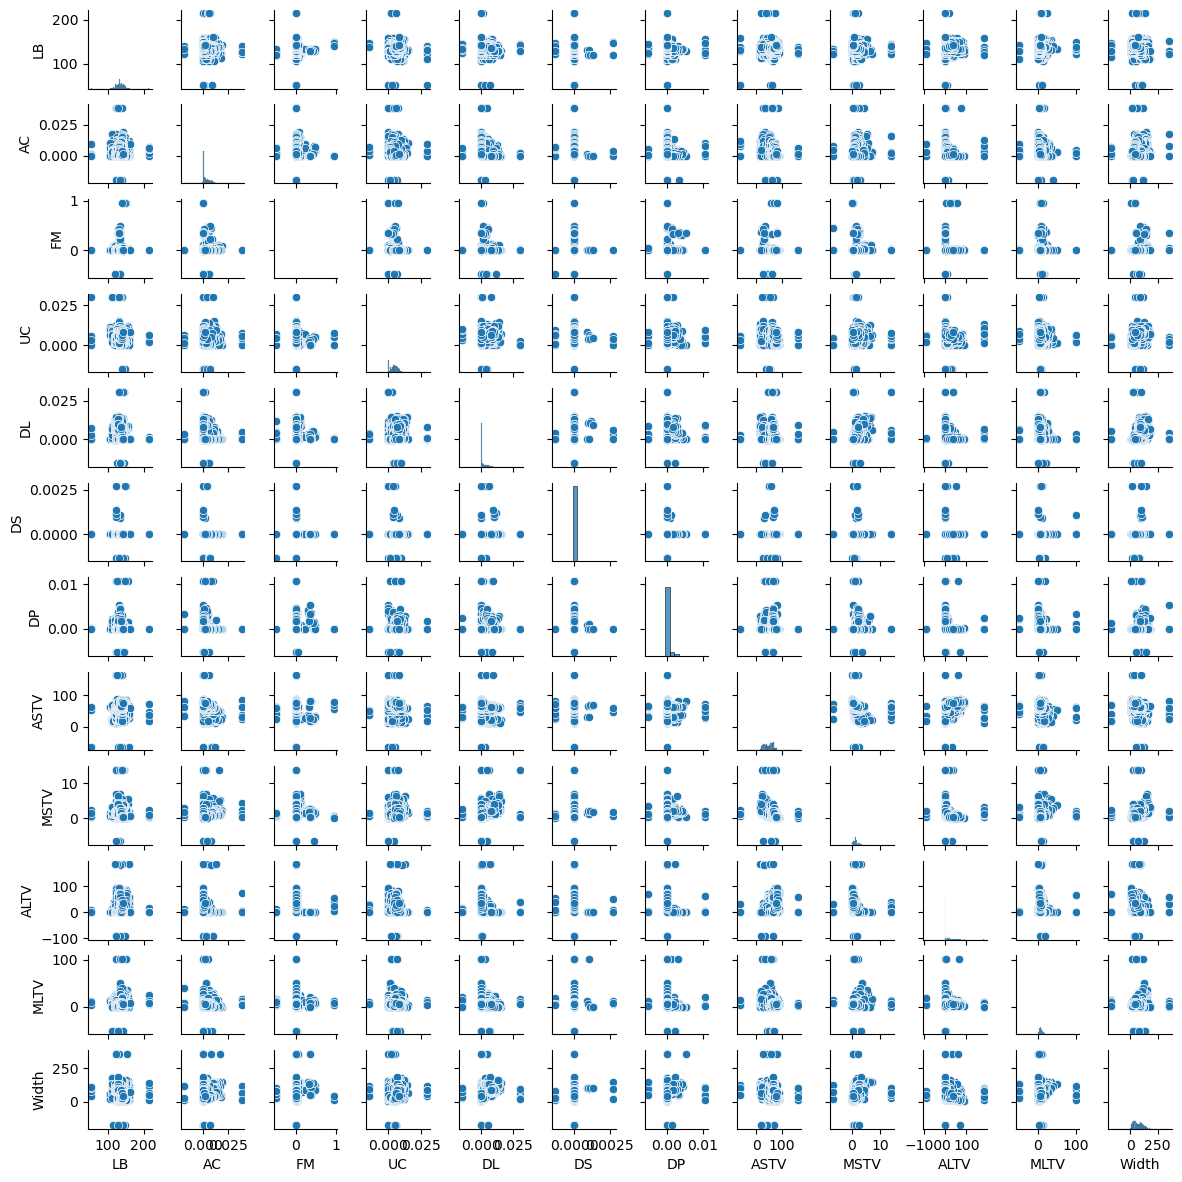

In [70]:
# Pair Plot
plt.figure(figsize=(15, 10))
sns.pairplot(df[numerical_cols], height= 1, aspect=1)
plt.show()

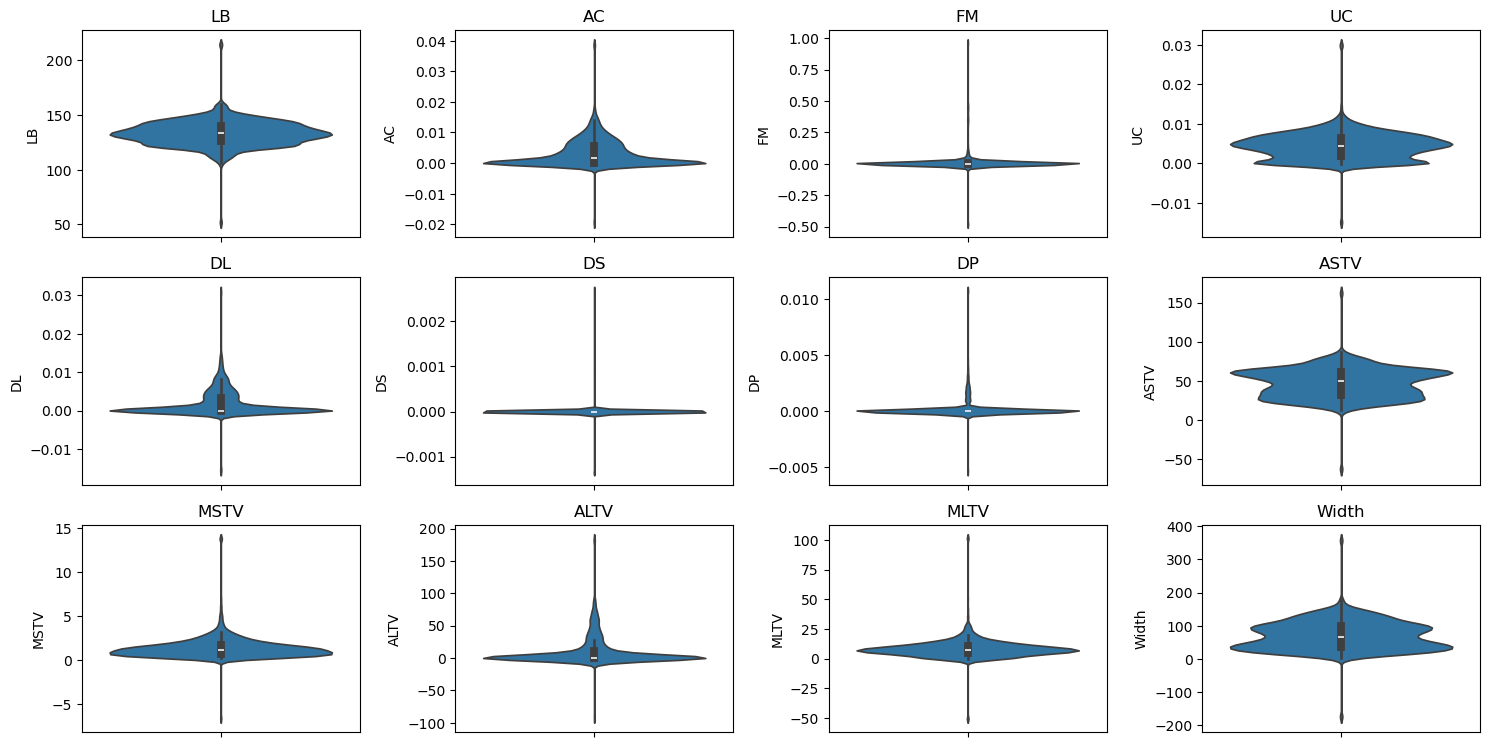

In [71]:
# Violin Plots for deeper insights
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i + 1)
    sns.violinplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Pattern Recognition and Insights:

##### - Histograms: Numerical features show varying distributions, some skewed.
##### - Box Plots: Outliers are present in some numerical variables.
##### - Pie Charts: Categorical variables ('Tendency', 'NSP') show imbalanced distributions.
##### - Correlation Heatmap: Relationships between numerical variables are visualized.
##### - The white space in the heatmap signifies the symmetrical nature of the correlation matrix, avoiding redundancy.
##### - Violin Plots: Detailed distributions of numerical variables.
##### - General: Data requires preprocessing for outliers and class imbalance.
##### - No temporal data available for time-based trends.
##### - The findings suggest that ASTV, ALTV, DL, and MSTV are important indicators of fetal distress, while accelerations (AC) are associated with fetal well-being.
##### - Treating outliers using the IQR method improved the robustness of the analysis.

### Conclusion:
##### - The analysis revealed significant insights into the cardiotocography dataset, highlighting relationships between fetal heart rate parameters and fetal state.
##### - Exploratory analysis reveals data characteristics: varying distributions, outliers, imbalanced categories.
##### - Preprocessing is crucial for robust analysis and modeling.
##### - Correlations can inform predictive model development.
##### - Further analysis: advanced outlier treatment, class imbalance handling, feature engineering, predictive modeling.


1) Summary of Key Insights:

- Categorical Dominance:
"Tendency" and "NSP" are heavily skewed towards specific categories, suggesting a categorical or limited-value nature. "Tendency" is mostly 0.0 and 1.0. "NSP" is mostly 3.0.
- Skewness and Non-Normality:
Several numerical variables (AC, UC, DL, DS, DP, MSTV, MLTV) exhibit strong skewness, indicating non-normal distributions.
- Multimodality:
Variables FM, ASTV, and ALTV display bimodal distributions, suggesting distinct subgroups.
- Outliers:
Numerous outliers are present across many numerical variables, potentially impacting statistical analysis.
- Weak Linear Relationships:
Most numerical variables show weak linear correlations, as seen in the pair plot and correlation heatmap.
- Moderate Correlations:
A few variable pairs (DL-Width, ASTV-MSTV, MSTV-Width, AC-ALTV, UC-ALTV) have moderate correlations, requiring further investigation.
- Distribution Visualization:
Histograms, violin plots, and box plots consistently highlight the data's distributional characteristics.


2) Impact on Decision-Making and Further Analyses:

- Data Preprocessing:
The skewness and outliers necessitate careful data preprocessing, including transformations or outlier handling.
- Model Selection:
The non-normal distributions and weak linear relationships influence model selection. Non-linear models or robust statistical methods may be more appropriate.
- Feature Engineering:
The moderate correlations suggest opportunities for feature engineering, creating new variables from related pairs.
- Categorical Treatment:
Tendency and NSP must be treated as categorical variables.
- Subgroup Analysis:
The bimodal distributions indicate the need for subgroup analysis to understand underlying patterns.
- Risk Assessment:
Outliers can point to errors or high risk cases, that will need to be addressed.
- Feature Selection:
Due to the low linear corelations, feature selection is important to reduce noise in models.

